<a href="https://colab.research.google.com/github/webivorous/FitVerse/blob/master/FitVerse-Analysis-ArpitKharbanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the spreadsheet containing the list of food items and their nutritional values

In [0]:
import gdown
from zipfile import ZipFile
gdown.download('https://drive.google.com/uc?export=download&id=1y9gMZtiEUfZJXUm5K4ut3hxmacmWPxsP', 'sls_data.zip', quiet=True)

with ZipFile('sls_data.zip', 'r') as zipObj:
   zipObj.extractall()

# Importing Libraries and forming dataframes from the CSV file imported

In [0]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

In [0]:
data = pd.read_csv("food.csv")
weeklyCalories = 1800 * 7

food = data['Food']
calories = data['Calories']
utility = data['Utility']
carbo = data['Carbohydrate']
fat = data['Fat']
protein = data['Protein']

In [0]:
populationSize = 50
numberOfGenerations = 100
crossOverRate = 0.5
rateOfMutation = 0.01

currentGen = []
currentBestSolution = []
highestScoreList = []
averageScoreList = []

#Initialise a Population
listofones = [1]*21
listofzeros = [0]*(len(food)-21)

for i in range (populationSize):
    currentGen. append(listofones + listofzeros)
    random.shuffle(currentGen[i])

# Genetic Algorithm Modelling 

In [0]:
for g in range (numberOfGenerations):
    
    fitnessScore = [0]*populationSize
    normalisedFitnessScore = [0]*populationSize
    totalPolulationFitnessScore = 0
    highestScore = 0
    nextGen = []
    newGen = []

    # Perform Evaluation of Fitness Score
    for i in range (populationSize):
        totalCalories = 0
        for j in range (len(food)):
            fitnessScore[i] += currentGen[i][j] * utility[j]
            totalCalories += currentGen[i][j] * calories[j]
        if totalCalories > weeklyCalories:
            fitnessScore[i] += weeklyCalories - totalCalories
        if fitnessScore[i] > highestScore:
            currentBestSolutionIndex = i
            highestScore = fitnessScore[i]

        totalPolulationFitnessScore += fitnessScore[i]
        
    highestScoreList.append(highestScore)
    averageScoreList.append(totalPolulationFitnessScore/populationSize)    
    currentBestSolution = currentGen[currentBestSolutionIndex].copy()

    for i in range (populationSize):
        normalisedFitnessScore[i] = fitnessScore[i]/totalPolulationFitnessScore

    #Perform Selection
    for i in range (populationSize):
        cumulativeNormalisedFitnessScore = 0
        rwScore = random.uniform(0, 1)
        for j in range (populationSize):
            cumulativeNormalisedFitnessScore += normalisedFitnessScore[j]
            if cumulativeNormalisedFitnessScore >= rwScore:
                nextGen.append(currentGen[j].copy())
                break    

    #Perform Cross Over
    for i in range (int(populationSize/2)):
        if crossOverRate > random.uniform(0, 1):

            randomNumber1 = random.randint(0, len(food)-1)
            randomNumber2 = random.randint(0, len(food)-1)

            if randomNumber1 > randomNumber2:
                crossOverPoint1 = randomNumber2
                crossOverPoint2 = randomNumber1
            else:
                crossOverPoint1 = randomNumber1
                crossOverPoint2 = randomNumber2

            child1 = nextGen[i][0:crossOverPoint1] + nextGen[i+int(populationSize/2)][crossOverPoint1:crossOverPoint2] + nextGen[i][crossOverPoint2:]
            child2 = nextGen[i+int(populationSize/2)][0:crossOverPoint1] + nextGen[i][crossOverPoint1:crossOverPoint2] + nextGen[i+int(populationSize/2)][crossOverPoint2:]

            nextGen[i] = child1.copy()
            nextGen[i+int(populationSize/2)] = child2.copy()

    #Perform Mutation
    for i in range (populationSize):
        for j in range (len(food)):
            if rateOfMutation > random.uniform(0, 1):
                nextGen[i][j] = abs(nextGen[i][j] - 1)

    #Adjust bits back to zero
    for i in range (populationSize):
        bitsToAdjust = sum(nextGen[i]) - 21

        if bitsToAdjust > 0:
            for j in range (bitsToAdjust):
                index = random.randint(0, len(food)-1)
                notFound = True
                while notFound:
                    if nextGen[i][index] == 1:
                        nextGen[i][index] = 0
                        notFound = False
                    else:
                        index += 1
                        index  = index%len(food)
        elif bitsToAdjust < 0:
            for j in range (abs(bitsToAdjust)):
                index = random.randint(0, len(food)-1)
                notFound = True
                while notFound:
                    if nextGen[i][index] == 0:
                        nextGen[i][index] = 1
                        notFound = False
                    else:
                        index += 1
                        index  = index%len(food) 
    
    #Forming a new Generation by getting fitest half from currentGen and fitest half from nextGen
    for i in range (populationSize):
        count = 0
        for j in range (populationSize):
            if fitnessScore[i] > fitnessScore[j]:
                count += 1
        if count >= int(populationSize/2):
            newGen.append(currentGen[i].copy())
    
    fitnessScore = [0]*populationSize
  
    for i in range (populationSize):
        totalCalories = 0
        for j in range (len(food)):
            fitnessScore[i] += nextGen[i][j] * utility[j]
            totalCalories += nextGen[i][j] * calories[j]
        if totalCalories > weeklyCalories:
            fitnessScore[i] += weeklyCalories - totalCalories
    
    for i in range (populationSize):
        count = 0
        for j in range (populationSize):
            if fitnessScore[i] > fitnessScore[j]:
                count += 1
        if count >= int(populationSize/2):
            newGen.append(nextGen[i].copy())
            
    for i in range (populationSize-len(newGen)):
        newGen.append(nextGen[random.randint(0, populationSize-1)].copy())
    
    currentGen = newGen.copy()

Highest Fitness Score: 1490
Average Polulation Fitness Score: 1480.8
Total Polulation Fitness Score: 74040


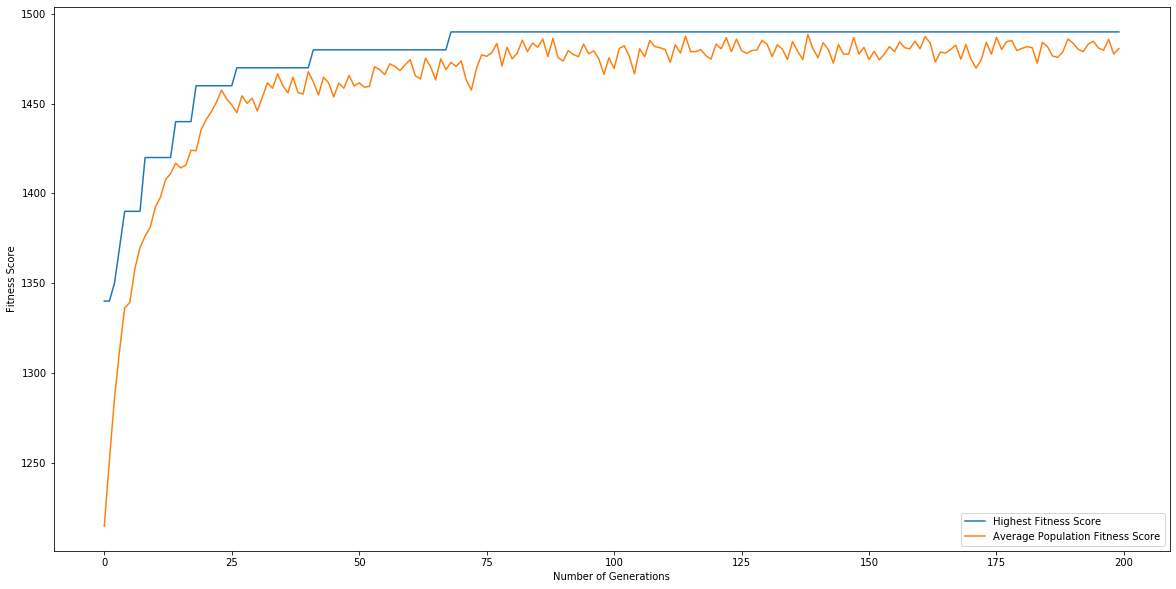

In [19]:
print("Highest Fitness Score:", highestScore) 
print("Average Polulation Fitness Score:", totalPolulationFitnessScore/populationSize)
print("Total Polulation Fitness Score:", totalPolulationFitnessScore)

plt.figure(figsize=(20,10))
plt.plot(highestScoreList, label='Highest Fitness Score')
plt.plot(averageScoreList, label = 'Average Population Fitness Score')
plt.ylabel('Fitness Score')
plt.xlabel('Number of Generations')
plt.legend(loc='lower right')
plt.show()

In [22]:
print("Recommended Menu for the week:\n")

totalcalories = 0
for i in range (len(food)):
    if currentBestSolution[i] == 1:
        totalcalories += calories[i]
        print(food[i])


Recommended Menu for the week:

FLAMICHE(100g)
SAMOSA(4pcs)
CHICKEN(90g)
FISH(90g)
MILK CHOCLATE(53g)
SALAD(400g)
RED WINE(1.5fl oz)
COKE(12oz)
Fruit Cake
Noodles
Pasta(150g)
Cherry Pie
Truffle
Dumpling(1 bowl)
Strudle(100gm)
Rye Bread
Pasties de Nata
pizza(general)
chole Bhature
Pav bhaji
Jalebi
